## training

In [16]:
import helper.get_image
import numpy as np

FOLDER_PATH = 'F://term7//CV//reference'

# random
train_size = 200
test_size = 100
val_size = 40

img_range = np.arange(1, 800)
X_train_pos_idx, X_test_pos_idx, X_val_pos_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)
X_train_neg_idx, X_test_neg_idx, X_val_neg_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)

X_train, Y_train = helper.get_concrete_data(X_train_pos_idx, X_train_neg_idx, path = FOLDER_PATH)
#X_test , Y_test  = helper.get_concrete_data(X_test_pos_idx, X_test_neg_idx, path = FOLDER_PATH)
#X_val  , Y_val   = helper.get_concrete_data(X_val_pos_idx, X_val_neg_idx, path = FOLDER_PATH)

print( X_train.shape, Y_train.shape )
#print( X_test.shape , Y_test.shape  )
#print( X_val.shape  , Y_val.shape   )

(400, 227, 227) (400,)


In [ ]:
# from filters.filter import GrayscaleNormalizer
# normalizer = GrayscaleNormalizer()
# X_train[:] = normalizer(X_train[:][0]) 
# X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [17]:
from filters.bilateral import bilateral_canny
bilateral_canny = bilateral_canny()
for idx in range(X_train.shape[0]):
    X_train[idx] = bilateral_canny.bilateral_canny_img(X_train[idx]) 

In [18]:
X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [19]:
# train a logistic model
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_flat, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Sliding window demonstration on single image

In [1]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl

In [2]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#FOLDER_PATH = "C:/Users/Dominic/Desktop/Concrete Crack Images for Classification/"



In [3]:
from filters.filter import GrayscaleNormalizer
#PATH = "C:/Users/Dominic/Desktop/VideoFrame/"

PATH = "F:\\term7\\CV\\ProjectTrail\\VideoFrame\\"
origin_img = PATH + "00165.jpg"
origin_img = cv2.imread(origin_img, 0).astype(np.float32)
img = origin_img

### If we do normalization of columns

(<matplotlib.text.Text at 0x1b5158b42e8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

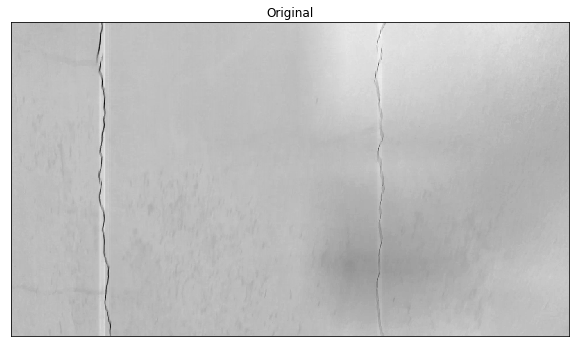

In [12]:

normalizer = GrayscaleNormalizer()
img = normalizer(img) 


plt.subplot(111),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

### shadow reduction on normalized image

(1080, 1920)
(1080, 1920)


(<matplotlib.text.Text at 0x20399992dd8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

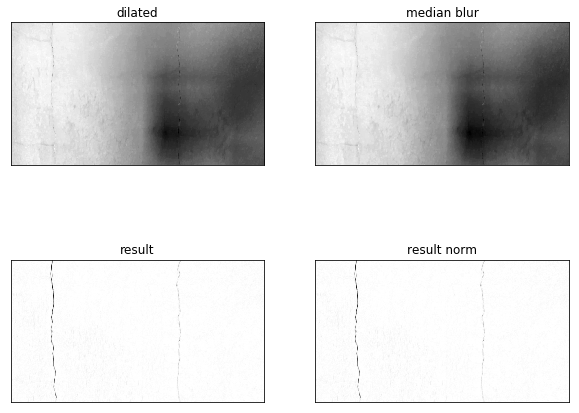

In [8]:

result_planes = []
result_norm_planes = []
plane = img.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))

plt.subplot(221)
plt.imshow(dilated_img, cmap='gray')
plt.title('dilated'),plt.xticks([]),plt.yticks([])

dilated_img = dilated_img
bg_img = cv2.medianBlur(dilated_img, 5)

plt.subplot(222)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur'),plt.xticks([]),plt.yticks([])

print(plane.shape) 
print(bg_img.shape)
cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img
norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                         beta=255, norm_type=cv2.NORM_MINMAX, 
                         dtype=cv2.CV_8UC1)
result_planes.append(diff_img)
result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

plt.subplot(223)
plt.imshow(result, cmap='gray')
plt.title('result'),plt.xticks([]),plt.yticks([])

plt.subplot(224)
plt.imshow(result_norm, cmap='gray')
plt.title('result norm'),plt.xticks([]),plt.yticks([])


### shadow reduction on un-normalized image

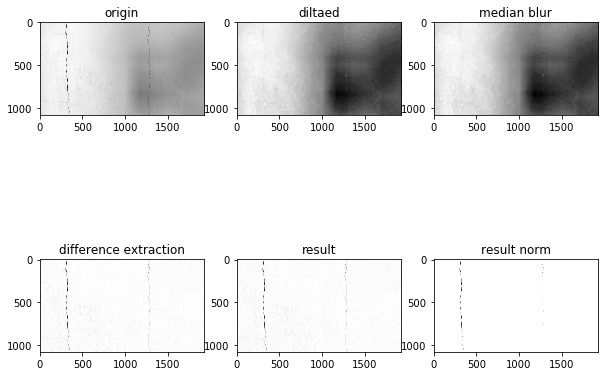

In [4]:
# input is called origin_img

PATH = "F:\\term7\\CV\\ProjectTrail\\VideoFrame\\"
origin_img = PATH + "00165.jpg"
origin_img = cv2.imread(origin_img, 0).astype(np.float32)

result_planes = []
result_norm_planes = []
plane = origin_img.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((17,17), np.uint8))

plt.subplot(231)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')

plt.subplot(232)
plt.imshow(dilated_img, cmap='gray')
plt.title('diltaed')

bg_img = cv2.medianBlur(dilated_img, 11)

plt.subplot(233)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur')

cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img


plt.subplot(234)
plt.imshow(diff_img, cmap='gray')
plt.title('difference extraction')

norm_img = diff_img.copy() # Needed for 3.x compatibility
a1 = cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

_, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
a2 = cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)



# norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
#                          beta=255, norm_type=cv2.NORM_MINMAX, 
#                          dtype=cv2.CV_8UC1)
# result_planes.append(diff_img)
# result_norm_planes.append(norm_img)

# result = cv2.merge(result_planes)
# result_norm2 = cv2.merge(result_norm_planes)

# cv2.imwrite('shadows_out.png', result)
# cv2.imwrite('shadows_out_norm.png', result_norm2)

plt.subplot(235)
plt.imshow(a1, cmap='gray')
plt.title('result')

plt.subplot(236)
plt.imshow(a2, cmap='gray')
plt.title('result norm')

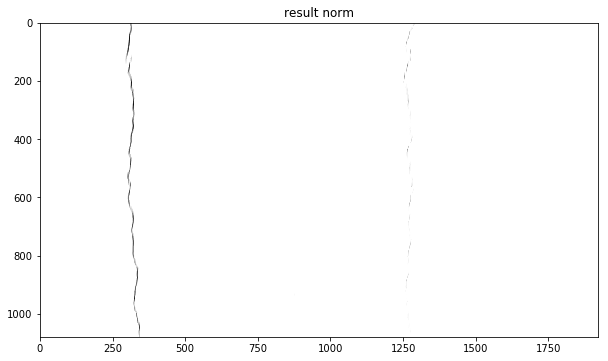

In [8]:
plt.imshow(a2, cmap='gray')
plt.title('result norm')

### add canny to normed, shadow reduced image

<function matplotlib.pyplot.show>

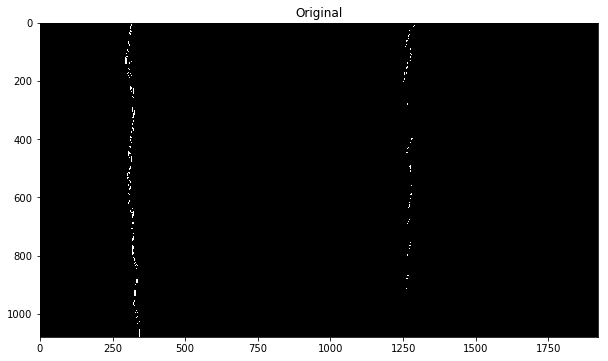

In [85]:
from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

img2 = bilateral_canny_video.canny_img(result)

plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.show

#### if add bilateral and canny, resul doesn't look very good. so for video feed, we apply canny only. bilateral filtered out too much information

<function matplotlib.pyplot.show>

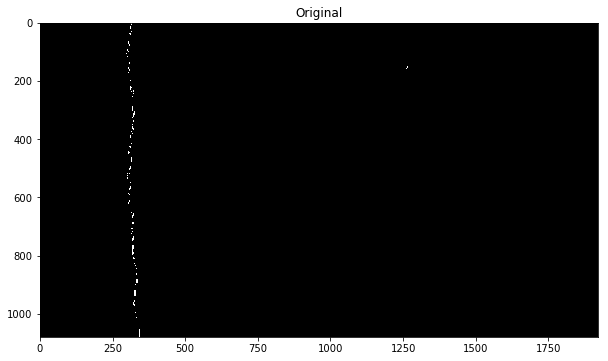

In [111]:
from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

img2 = bilateral_canny_video.bilateral_canny_img(result)

plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.show()

### shadow on single image

Plotting...


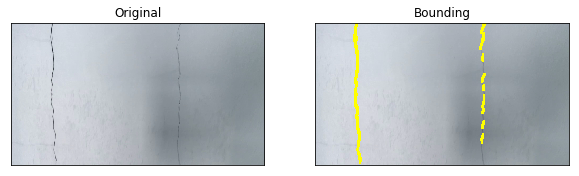

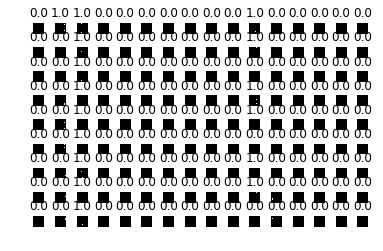

In [27]:
from helper import rolling_window, shade_area
img = frame_after_canny
#stride = (112, 106)
stride = (106,112)
window_size = (227, 227)
imgs = rolling_window(img, window_size, stride)
# for i in range(nx):
#     for j in range(ny):
#         imgs[i, j] = bilateral_canny_video.grayscale_img(imgs[i, j])
# print(imgs.shape)


nx, ny = imgs.shape[0], imgs.shape[1]
plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
print("Plotting...")

boxed = shade_area(origin, imgs, result, window_size, stride)

plt.figure(figsize=(10,5))

plt.subplot(121),plt.imshow(origin, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(boxed, cmap='gray')
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()

## try adaptive thresholding

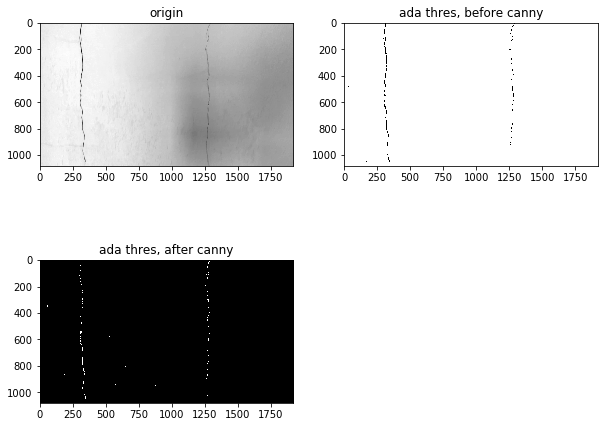

In [10]:

PATH = "F:\\term7\\CV\\ProjectTrail\\VideoFrame\\"
origin_img = PATH + "00165.jpg"
origin = cv2.imread(origin_img)
origin_img =  cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
adath = adaptiveThreshold(origin_img)

from filters.bilateral import bilateral_canny
bilateral_canny = bilateral_canny()
frame_after_canny = bilateral_canny.canny_img(adath)


plt.subplot(221)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')


plt.subplot(222)
plt.imshow(adath, cmap='gray')
plt.title('ada thres, before canny')


plt.subplot(223)
plt.imshow(frame_after_canny, cmap='gray')
plt.title('ada thres, after canny')
plt.show()

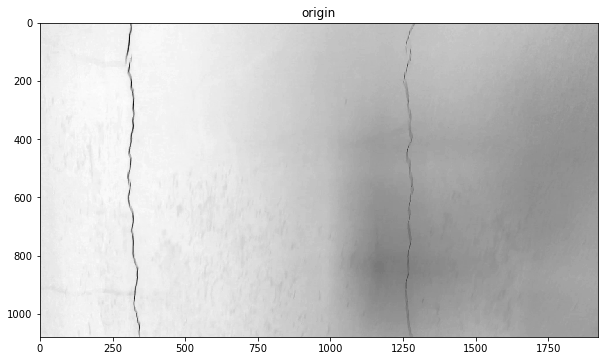

In [12]:
plt.imshow(origin_img, cmap='gray')
plt.title('origin')
plt.show()

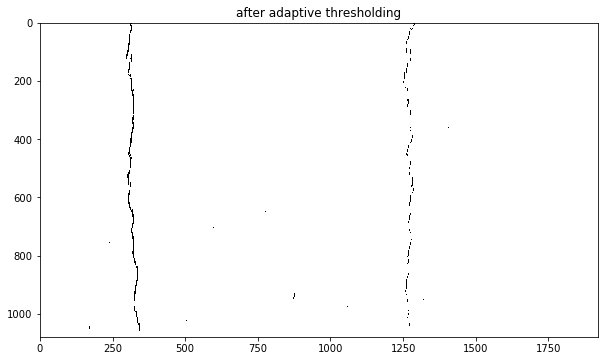

In [14]:
plt.imshow(adath, cmap='gray')
plt.title("after adaptive thresholding")
plt.show()

Plotting...


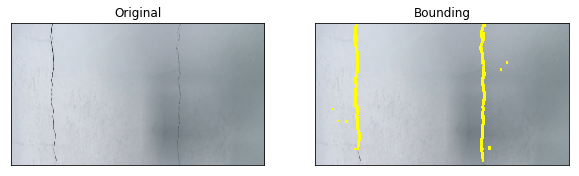

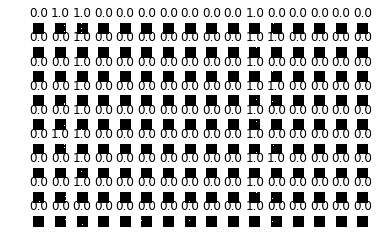

In [81]:
from helper import rolling_window, shade_area
img = frame_after_canny
#stride = (112, 106)
stride = (106,112)
window_size = (227, 227)
imgs = rolling_window(img, window_size, stride)
# for i in range(nx):
#     for j in range(ny):
#         imgs[i, j] = bilateral_canny_video.grayscale_img(imgs[i, j])
# print(imgs.shape)


nx, ny = imgs.shape[0], imgs.shape[1]
plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
print("Plotting...")

boxed = shade_area(origin, imgs, result, window_size, stride)

plt.figure(figsize=(10,5))

plt.subplot(121),plt.imshow(origin, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(boxed, cmap='gray')
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()

## if add tophat after adaptive threshold

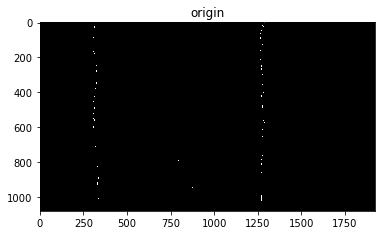

In [82]:
adath = np.uint8(adath)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
myfiltered = cv2.morphologyEx(adath, cv2.MORPH_TOPHAT, kernel)
plt.imshow(myfiltered, cmap='gray')
plt.title('origin')
plt.show()

Plotting...


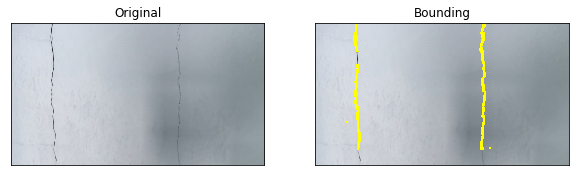

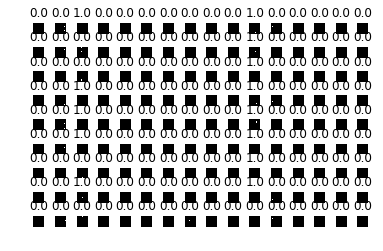

In [83]:
from helper import rolling_window, shade_area
img = myfiltered
#stride = (112, 106)
stride = (106,112)
window_size = (227, 227)
imgs = rolling_window(img, window_size, stride)
# for i in range(nx):
#     for j in range(ny):
#         imgs[i, j] = bilateral_canny_video.grayscale_img(imgs[i, j])
# print(imgs.shape)


nx, ny = imgs.shape[0], imgs.shape[1]
plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
print("Plotting...")

boxed = shade_area(origin, imgs, result, window_size, stride)

plt.figure(figsize=(10,5))

plt.subplot(121),plt.imshow(origin, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(boxed, cmap='gray')
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()

# video generation

#### video to frame

In [9]:
video_file = "F://term7//CV//ProjectTrail//videos//IMG_5161.mov"
frame_file = "F://term7//CV//ProjectTrail//IMG_5161frame"
from video import video
v = video(video_file)
v.video_to_frames(frame_file)


Converting video..

Done extracting frames.
595 frames extracted
It took 58 seconds forconversion.


In [14]:
import cv2

In [1]:
def norm_dilate_median(origin_img):
    result_planes = []
    result_norm_planes = []
    plane = origin_img.astype(np.uint8)
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    cv2.absdiff(plane, bg_img)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img= diff_img
    norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                             beta=255, norm_type=cv2.NORM_MINMAX, 
                             dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)

    return result_norm

In [9]:
def adaptiveThreshold(origin_img):
    return cv2.adaptiveThreshold(origin_img ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,5)

In [3]:
def save_image(img, dst, filename):
    if not os.path.exists(dst):
        os.mkdir(dst)  
    cv2.imwrite(os.path.join(dst , filename), img)
    cv2.waitKey(0)

In [4]:
from helper import rolling_window, shade_area

def generate_shadowed_img(origin, cannyed, stride = (106,112), window_size = (227, 227)):
    cannyed
    
    imgs = rolling_window(cannyed, window_size, stride)
    
    nx, ny = imgs.shape[0], imgs.shape[1]
    
    result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)

    boxed = shade_area(origin, imgs, result, window_size, stride)

    return boxed

In [5]:
def tophat(img, element=(2,2)):
    img = np.uint8(img)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,element)
    myfiltered = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    return myfiltered

In [6]:
import time

In [22]:
import os
INPUT_PATH = "F:\\term7\\CV\\ProjectTrail\\IMG_5161frame\\"
OUTPUT_PATH  = "F:\\term7\\CV\\ProjectTrail\\OutputIMG_5161frame\\"

input_format = 'jpg'

from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

import time
time_start = time.time()
time_pre = time.time()
time_norm = 0
time_canny =  0
time_predict_and_shadow = 0
time_save = 0

for f in os.listdir(INPUT_PATH):
    if f.endswith(input_format):
        image_path = os.path.join(INPUT_PATH, f)
        frame = cv2.imread(image_path)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # reduce shadow by dilate, median, or threshold
#         frame_shadow_reduced = norm_dilate_median(gray_frame)
        time_pre = time.time()
        frame_shadow_reduced = adaptiveThreshold(gray_frame)
        time_norm += time.time() - time_pre

        time_pre = time.time()
        # generate output after canny filter, or tophat
        frame_after_canny = bilateral_canny_video.canny_img(frame_shadow_reduced)
#         frame_after_canny = tophat(frame_shadow_reduced,element=(6,6))
        time_canny += time.time() - time_pre
        time_pre = time.time()    
       
        #save_image(frame_after_canny, "F:\\term7\\CV\\ProjectTrail\\Canny000new\\", f)
        # generate img with shadowe
        frame_final = generate_shadowed_img(frame, frame_after_canny)
        time_predict_and_shadow += time.time() - time_pre
        time_pre = time.time()
        
        # save to folder
        save_image(frame_final, OUTPUT_PATH, f)
        time_save= time.time() - time_pre
        time_pre = time.time()    
        
print("total time for frames generation is {}".format(time.time()-time_start))
print("time norm{}".format(time_norm))
print("time_canny{}".format(time_canny))
print("time_predict_and_shadow{}".format(time_predict_and_shadow))
print("time_save{}".format(time_save))

KeyboardInterrupt: 

stats:

for file 000, consists of 539 images 

total time for frames generation is 365.9983892440796

time norm9.641156435012817

time_canny4.354477405548096

time_predict_and_shadow291.21285343170166

time_save0.05203747749328613

## video gem

#### frames to video

In [ ]:

time_start = time.time()
#video_file = "F://term7//CV//ProjectTrail//videos//File_001.mov"
#frame_file = "F://term7//CV//ProjectTrail//Output000adath"
output_video_loc =  "F://term7//CV//ProjectTrail//videos//IMG_5161_bilate.mov"
from video import video
v = video(video_file)
v.frames_to_video(output_video_loc, input_loc=frame_file, debug=True)
print("total time video saving {}".format(time.time()-time_start))

# last testing on the video capture near canteen

(1080, 1920)
(1080, 1920)


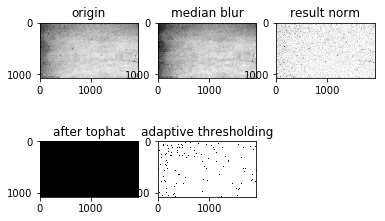

In [35]:
# input is called origin_img

PATH = "F:\\term7\\CV\\ProjectTrail\\IMG_5161frame\\"
origin_img = PATH + "00541.jpg"
origin_img = cv2.imread(origin_img, 0).astype(np.float32)

result_planes = []
result_norm_planes = []
plane = origin_img.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))

plt.subplot(231)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')

dilated_img = dilated_img
bg_img = cv2.medianBlur(dilated_img, 5)

plt.subplot(232)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur')

print(plane.shape) 
print(bg_img.shape)
cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img
norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                         beta=255, norm_type=cv2.NORM_MINMAX, 
                         dtype=cv2.CV_8UC1)
result_planes.append(diff_img)
result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm2 = cv2.merge(result_norm_planes)

result_morp = tophat(result_norm2,element=(1,1))

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm2)

plt.subplot(233)
plt.imshow(result, cmap='gray')
plt.title('result norm')

plt.subplot(234)
plt.imshow(result_morp, cmap='gray')
plt.title('after tophat')

adath = adaptiveThreshold(plane)
plt.subplot(235)
plt.imshow(adath, cmap='gray')
plt.title('adaptive thresholding')


plt.show()